In [ ]:
#https://us05web.zoom.us/j/82683930939?pwd=NTZ1VnNkVHVCL29XRTRkb0F0eDMydz09

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
import gdown

# Data preparation

Let's consider one of the standard datasets - a network of social contacts of people [engaged in karate](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

In [2]:
G = nx.karate_club_graph()

print('Nodes:',G.number_of_nodes())
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G))

Nodes: 34
Edges: 78
Density: 0.13903743315508021


In [3]:
def draw_net(G, pos, metrics, name, ax = None):

    norm = 1000/np.max(metrics)

    options = {
    'with_labels':True,
    'node_color': [v * norm for v in metrics],
    'node_size': [v * norm for v in metrics],
    'edge_color': 'black',
    'linewidths': 1.5,
    'width': 1.5,
    'cmap': 'YlGnBu'
    #'cmap': 'Spectral'
    }

    nx.draw(G, pos, **options)

    if ax is None:
        fig, ax = plt.subplots(figsize = (12,8))

    ax.set_title(name, fontsize=24)

In [4]:
def roll(*dice):
    return sum(np.random.randint(1, die) for die in dice)

In [5]:
roll(20,6)

4

In [6]:
def func(a,b, c=1, mult = None):
    res = a + b + c
    if mult is True:
        res = a*b*c
    
    return res

In [7]:
func(4,8, mult = True)

32

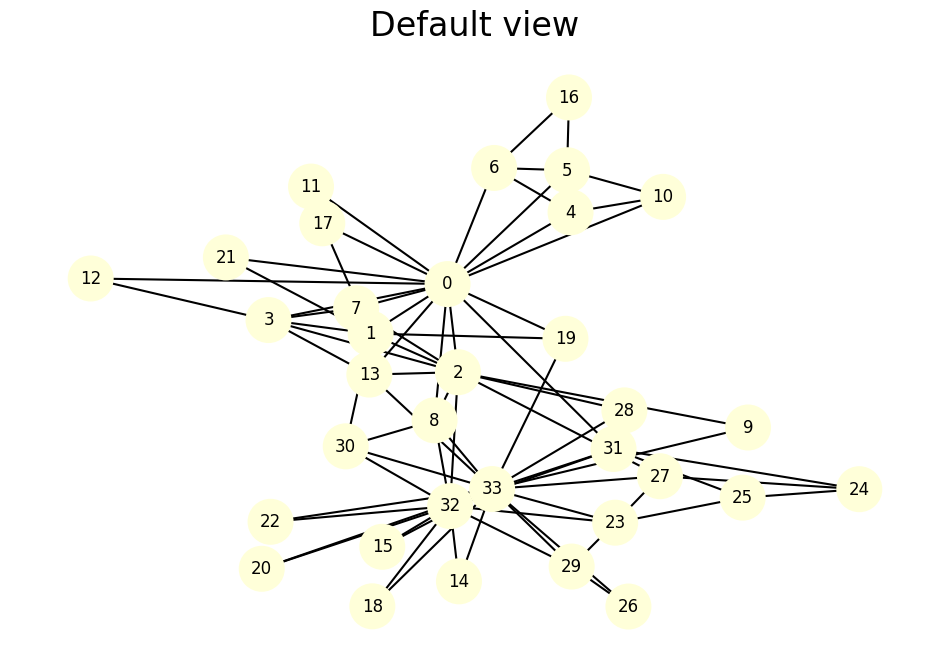

In [8]:
seed = 42
pos = nx.spring_layout(G, iterations=100, seed = seed) # node coordinates

fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(np.ones(G.number_of_nodes())), 'Default view', ax = ax)

# Network centrality measures

### Degree centrality

Degree centrality shows the fraction of the nearest neighbors of vertex $i$ out of the maximum possible $N-1$, $N$ is the number of vertices in the network.
$$
c_d(i)=\frac{k_i}{N-1}.
$$

In [9]:
nx.degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

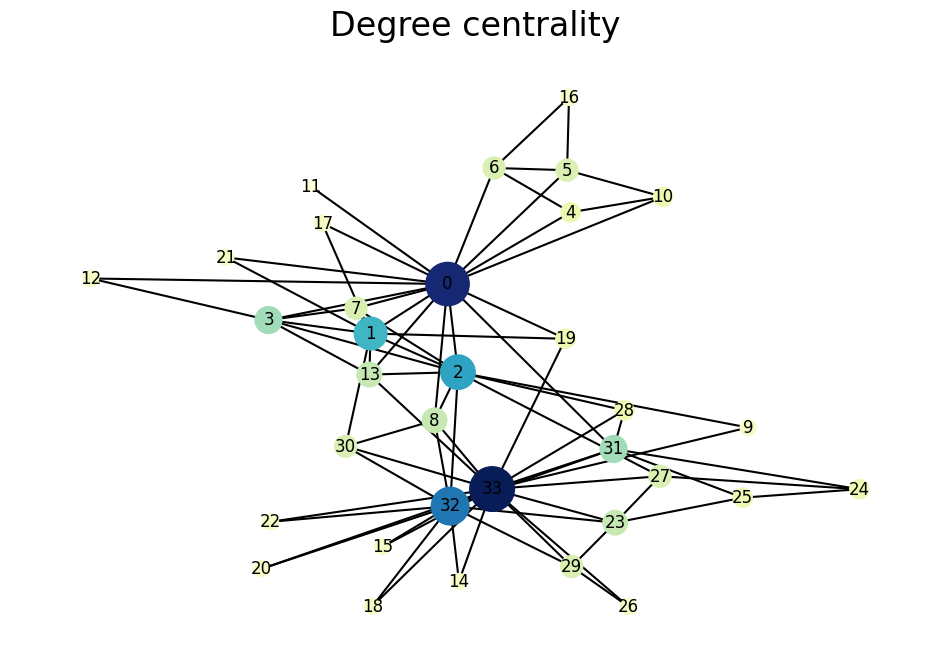

In [10]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.degree_centrality(G).values()), 'Degree centrality', ax = ax)

### Betweenness centrality 
$c_{b}(i)$ is determined by the fraction of the shortest paths passing through the $i$-th vertex:
$$
c_{b}(i)=\frac{1}{(N-1)(N-2)}\sum_{j\ne i \ne k}\frac{\sigma_{j,k}(i)}{\sigma_{j,k}}
$$
where $\sigma_{j,k}$ is the number of shortest paths between vertices $j$ and $k$, $\sigma_{j,k}(i)$ are those that pass through vertex $i$.

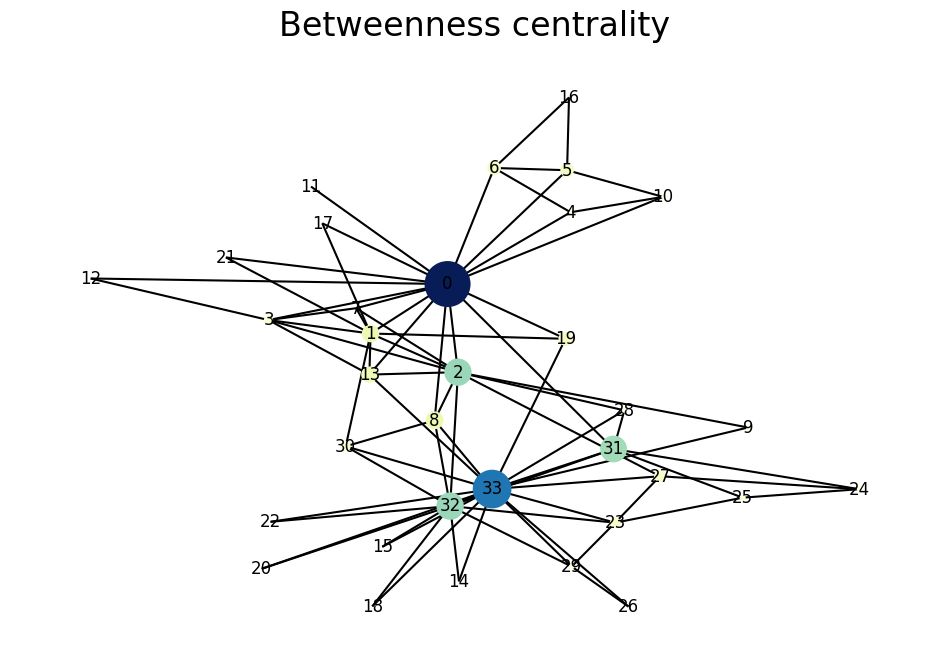

In [12]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.betweenness_centrality(G).values()), 'Betweenness centrality', ax = ax)

### Eigenvector centrality

$$
c_e(i)=x_i,
$$
where $x_i$ is the $i$ component of the eigenvector $\vec{x}$ of the adjacency matrix of the graph $A$ corresponding to the largest eigenvalue $\lambda_{max}$:
$$
A\vec{x}=\lambda_{max}\vec{x}.
$$

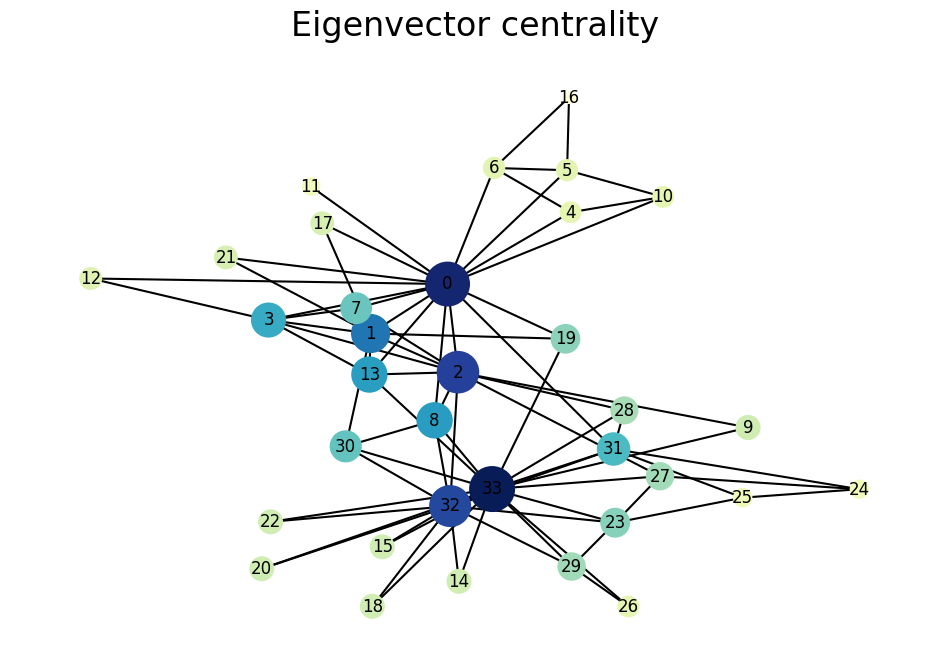

In [13]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.eigenvector_centrality(G).values()), 'Eigenvector centrality', ax = ax)

## Closeness centrality
$$
C_{c}(i)=\frac{N-1}{\sum_{j}d(i,j)},
$$

$d(i,j)$ is the length of the shortest path from vertex $i$ to vertex $j$.

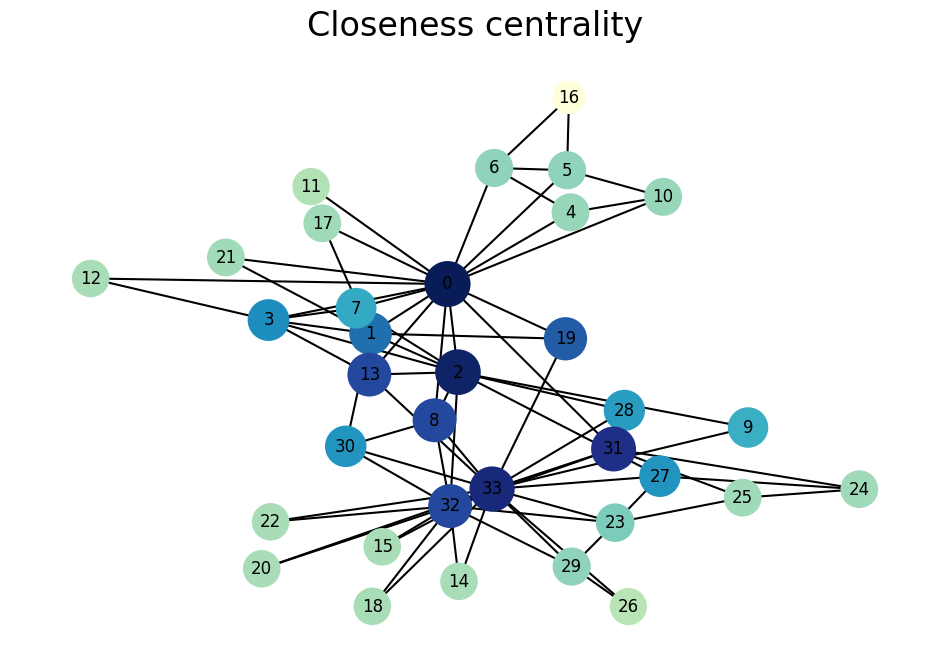

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.closeness_centrality(G).values()), 'Closeness centrality', ax = ax)

# Network decomposition

## [Rich club coefficient](https://en.wikipedia.org/wiki/Rich-club_coefficient)

RC is determined as:
$$
\phi(k)=\frac{2E_{>k}}{N_{>k}(N_{>k}-1)},
$$

where ${\displaystyle E_{>k}}$ - is the number of edges between nodes with a degree >$k$, $N_{>k}$ - is the number of such nodes. 

See more in the [paper](https://arxiv.org/pdf/physics/0701290.pdf)

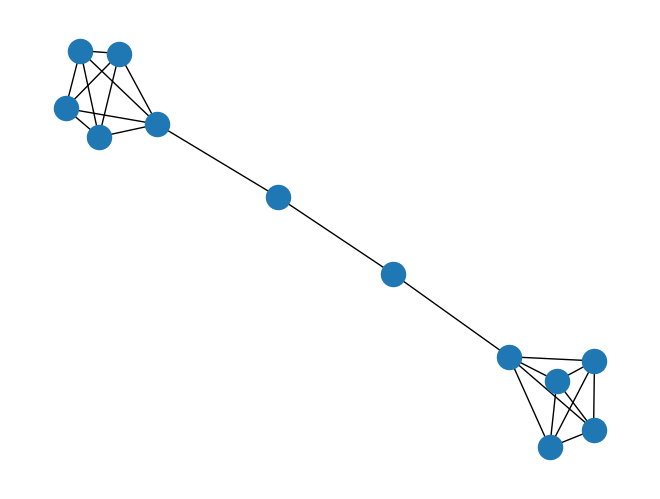

In [15]:
BR= nx.barbell_graph(5,2)
nx.draw(BR)

In [17]:
nx.rich_club_coefficient(BR, normalized=False, seed=42)

{0: 0.3484848484848485,
 1: 0.3484848484848485,
 2: 0.4444444444444444,
 3: 0.4444444444444444,
 4: 0.0}

## k-core decomposition
$k$-core is the maximal connected subgraph of a graph G, where each node has degree at least $k$. 

A simple [example](https://drive.google.com/file/d/12BfjU4CMcTzCK3pCxtMx-iLHYwVJe-uG/view?usp=sharing):

In [18]:
!gdown 12BfjU4CMcTzCK3pCxtMx-iLHYwVJe-uG

Downloading...
From: https://drive.google.com/uc?id=12BfjU4CMcTzCK3pCxtMx-iLHYwVJe-uG
To: c:\Users\kuzne\Documents\ACTIVE_PROJECTS\network_science\sem3\k-core-exp.txt

  0%|          | 0.00/118 [00:00<?, ?B/s]
100%|██████████| 118/118 [00:00<?, ?B/s] 


In [19]:
G=nx.read_edgelist('k-core-exp.txt', nodetype=int)

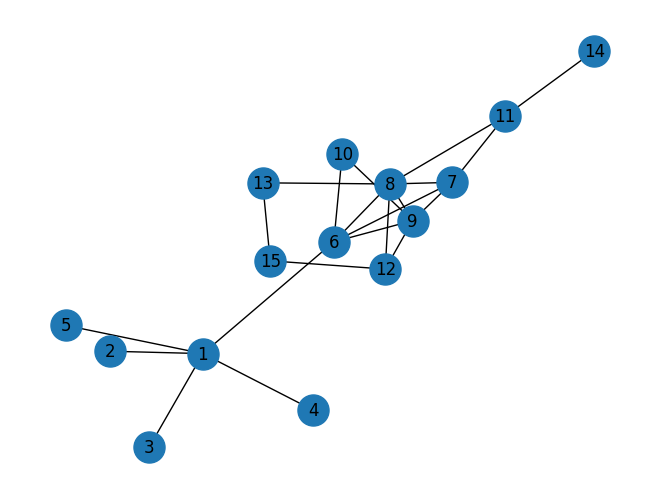

In [20]:
pos=nx.spring_layout(G,iterations=20)
colors=['b']*G.number_of_nodes() # color of nodes
nx.draw(G,pos,node_size=500,with_labels=True)
limits=plt.axis('off') 

Let's find $k$-core for different $k$ values and highlight the corresponding $k$-core: 

[6, 7, 8, 9, 10, 11, 12, 13, 15]


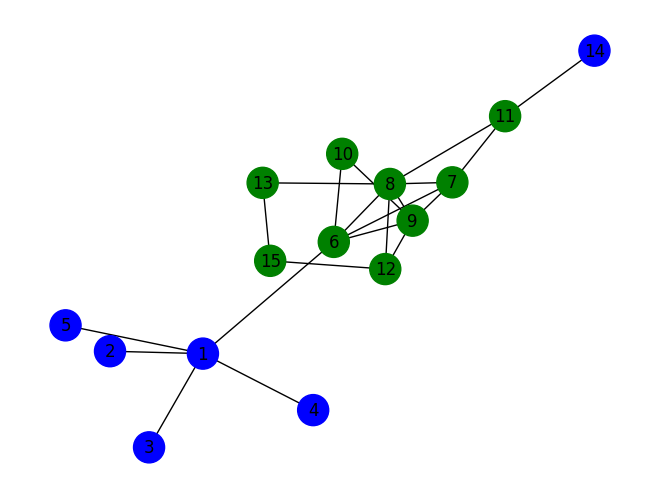

In [21]:
kG=nx.k_core(G,k=2)
print(kG.nodes())
for node in kG.nodes:
    colors[node-1]='g'

nx.draw(G,pos,node_size=500,node_color=colors,with_labels=True)

[8, 9, 6, 7]


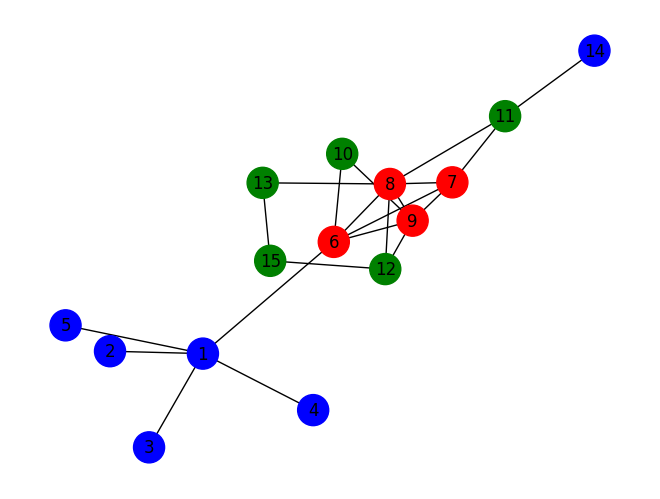

In [22]:
kG=nx.k_core(G,k=3)
print(kG.nodes())
for node in kG.nodes:
    colors[node-1]='r'

nx.draw(G,pos,node_size=500,node_color=colors,with_labels=True)